In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

from epf.util import load_and_concat_data, predict_with_timestamps
from epf.config import PROCESSED_DATA_DIR, FeatureConfig

In [ ]:
file_paths = {'de_prices': ['de_prices_2020.csv', 'de_prices_2021.csv', 'de_prices_2022.csv', 'de_prices_2023.csv', 'de_prices_2024.csv']}

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

# avg Weekly volatility de lu prices

In [ ]:
tmp = []

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])
    tmp.append(data)

df = pd.concat(tmp, axis=1)

In [ ]:
df['volatility'] = df['de_prices'].rolling(window=24).std()
df['year'] = df.index.year
df['day'] = [x.strftime('%j') for x in df.index]
df['week'] = [x.strftime('%W') for x in df.index]

In [ ]:
df['mean_price'] = df['de_prices'].rolling(window=24*7).mean()
df['std_dev'] = df['de_prices'].rolling(window=24*7).std()

df['upper_band'] = df['mean_price'] + df['std_dev']
df['lower_band'] = df['mean_price'] - df['std_dev']

sns.set_style('ticks')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['mean_price'], color=COLORS['magenta'], label='Mean Price')
plt.fill_between(df.index, df['lower_band'], df['upper_band'], color=COLORS['purple'], alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Price in €/MWh')
plt.legend(loc='upper left')

#plt.title('Average weekly volatility of Prices in DE_LU bidding zone')

#plt.savefig("../reports/figures/volatility.pdf", dpi=300, bbox_inches='tight')

# Normed features

In [ ]:
path = PROCESSED_DATA_DIR / "features.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

In [ ]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../data/processed/train_data/train_df.pkl", "rb") as f:
    train_df = pkl.load(f)
fs = pd.read_csv("../data/processed/features.csv", index_col=0, parse_dates=True)

feature_set = fs[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_load_rm_seasonal', 'de_load_rm_seasonal', 'dk_load_rm_seasonal', 'fr_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]
train_df = train_df[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_load_rm_seasonal', 'de_load_rm_seasonal', 'dk_load_rm_seasonal', 'fr_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]

palette = {
    # first palette
    'de_gas_gen_rm_seasonal': COLORS['magenta'],
    'de_hard_coal_gen_rm_seasonal': COLORS['purple'],
    'de_lignite_gen_rm_seasonal': COLORS['light_purple'],
    'de_solar_gen_rm_seasonal': COLORS['orange'],
    'de_wind_gen_offshore_rm_seasonal': COLORS['light_orange'],
    'de_wind_gen_onshore_rm_seasonal': COLORS['gold'],

    # second palette
    'ch_load_rm_seasonal': COLORS['magenta'],
    'de_load_rm_seasonal': COLORS['purple'],
    'dk_load_rm_seasonal': COLORS['light_purple'],
    'fr_load_rm_seasonal': COLORS['orange'],

    # third palette
    'ch_prices_hat_rm_seasonal': COLORS['magenta'],
    'de_prices_hat_rm_seasonal': COLORS['purple'],
    'dk1_prices_hat_rm_seasonal': COLORS['light_purple'],
    'dk2_prices_hat_rm_seasonal': COLORS['orange'],
    'fr_prices_hat_rm_seasonal': COLORS['light_orange'],
}

labels = {
    #first labels
    'de_solar_gen_rm_seasonal': 'Solar',
    'de_wind_gen_onshore_rm_seasonal': 'Wind\nonshore',
    'de_wind_gen_offshore_rm_seasonal': 'Wind\noffshore',
    'de_hard_coal_gen_rm_seasonal': 'Hard\nCoal',
    'de_lignite_gen_rm_seasonal': 'Lignite',
    'de_gas_gen_rm_seasonal': 'Gas',

    # second labels
    'de_load_rm_seasonal': 'DE',
    'fr_load_rm_seasonal': 'FR',
    'ch_load_rm_seasonal': 'CH',
    'dk_load_rm_seasonal': 'DK',

    # third labels
    'de_prices_hat_rm_seasonal': 'DE-LU',
    'ch_prices_hat_rm_seasonal': 'CH',
    'dk1_prices_hat_rm_seasonal': 'DK1',
    'dk2_prices_hat_rm_seasonal': 'DK2',
    'fr_prices_hat_rm_seasonal': 'FR',
}

train_mean = train_df.mean()
train_std = train_df.std()

keys = feature_set.keys()

sns.set_style("ticks")

df_std = (feature_set - train_mean) / train_std
plt.figure(figsize=(12, 4))

ax = sns.violinplot(data=df_std, inner="quart", palette=palette, saturation=1)
for violin, color in zip(ax.collections[::1], palette.values()):
    facecolor = plt.matplotlib.colors.to_rgba(color, alpha=0.4)
    violin.set_facecolor(facecolor)
    violin.set_edgecolor(color)
#ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xticks(range(len(df_std.columns)))
ax.set_xticklabels([labels[col] for col in df_std.columns])
ax.set_ylabel('Normed')
ax.axvline(x = 5.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)
ax.axvline(x = 9.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)

sec = ax.secondary_xaxis(location=0)
sec.set_xticks(ticks=[2.5, 7.5, 12], labels=['\nDE Generation', '\nLoad', '\nPrices'])
sec.tick_params('x', length=0, pad=20)
sec.spines["bottom"].set_visible(False)

sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(ticks=[5.5, 9.5], labels=[])
sec2.tick_params('x', length=40, width=0.5)
sec2.spines["bottom"].set_visible(False)

plt.savefig("../reports/figures/normed_feature_distribution_corrected.pdf", dpi=300, bbox_inches='tight')

plt.show()

# Metrics

In [ ]:
import pickle as pkl
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

with open("../data/processed/performance.pkl", "rb") as f:
    performance = pkl.load(f)

with open("../data/processed/val_performance.pkl", "rb") as f:
    val_performance = pkl.load(f)

models = {
    'lstm_vre': 'VRE',
    'lstm_all_features': 'all',}

palette = {
    'Validation': COLORS['magenta'],
    'Test': COLORS['purple'],
}

# Metriken, die geplottet werden sollen
metrics = {'mean_absolute_error':'MAE', 'mean_absolute_percentage_error':'MAPE', 'root_mean_squared_error':'RMSE'}

# Bereite die Daten für die Plots vor
data = []
for model_key, model_name in models.items():
    for metric, name in metrics.items():
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Validation',
            'Value': val_performance[model_key][metric]
        })
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Test',
            'Value': performance[model_key][metric]
        })

df = pd.DataFrame(data)

# Erstelle die Barplots
sns.set_style('ticks')
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)), sharex=True)

for i, (metric_key, metric_name) in enumerate(metrics.items()):
    sns.barplot(
        data=df[df['Metric'] == metric_name],
        x='Model',
        y='Value',
        hue='Dataset',
        palette=palette,
        ax=axes[i],
        dodge=True
    )
    axes[i].set_ylabel(metric_name)
    axes[i].set_xlabel('Features')

    if i == 0:
        axes[i].legend()
    else:
        axes[i].legend().remove()

plt.tight_layout()
plt.show()

### absolute error over time

retrieve the predictions, maybe group them by day/week/month to see error at different points in time

In [6]:
import pandas as pd
import pickle as pkl
from epf.util import predict_with_timestamps
from datetime import datetime, timezone
import matplotlib.pyplot as plt

with open("../models/lstm_vre.pkl", "rb") as f:
    model_obj = pkl.load(f)

window = model_obj['window']
test_df = model_obj['test_df']
model = model_obj['best_model']

subset = window.get_test_subset(datetime(2024, 1, 1, 0, 0, tzinfo= timezone.utc), datetime(2024, 3, 31, 23, 0, tzinfo= timezone.utc))
df_preds, df_trues = predict_with_timestamps(model, window.test_ts, label_columns=window.label_columns)

In [9]:
df_preds.set_index('timestamp', inplace=True)
df_trues.set_index('timestamp', inplace=True)

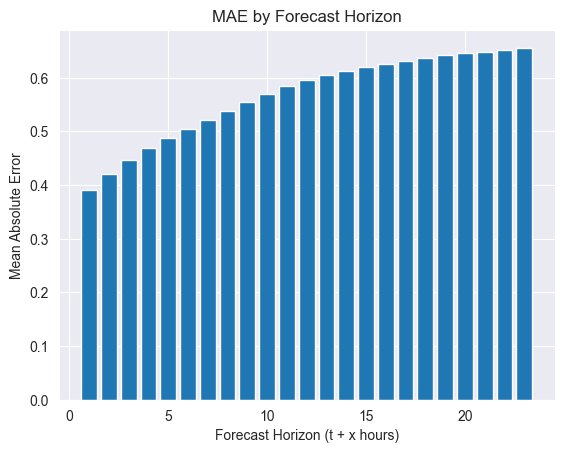

In [34]:
import numpy as np

mae_per_horizon = np.mean(np.abs(df_trues.iloc[:, 1:].values - df_preds.iloc[:, 1:].values), axis=0)

plt.bar(range(1, 24), mae_per_horizon)
plt.xlabel("Forecast Horizon (t + x hours)")
plt.ylabel("Mean Absolute Error")
plt.title("MAE by Forecast Horizon")
plt.grid(True)
plt.show()

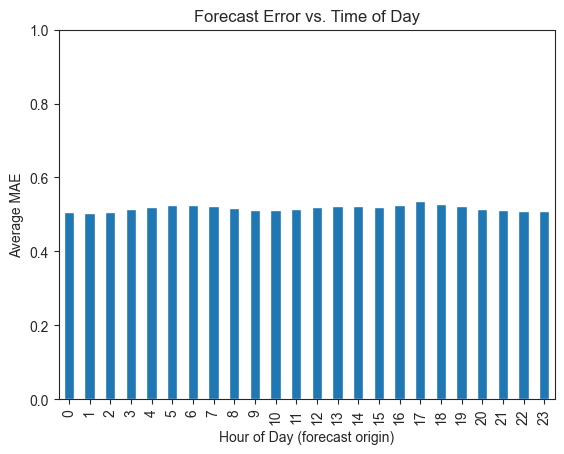

In [39]:
df_errors = df_preds.copy()
df_errors.iloc[:, 1:] = np.abs(df_preds.iloc[:, 1:] - df_trues.iloc[:, 1:])

df_errors["hour"] = df_errors.index.hour
hourly_mae = df_errors.groupby("hour").mean().mean(axis=1)

sns.set_style('ticks')

hourly_mae.plot(kind="bar")
plt.xlabel("Hour of Day (forecast origin)")
plt.ylabel("Average MAE")
plt.title("Forecast Error vs. Time of Day")
plt.ylim(0,1)
plt.show()

In [75]:
import pandas as pd

ghi = pd.read_csv("../data/raw/de_global_horizontal_irradiation_2024.csv", skiprows=6, parse_dates=True, index_col=1, names=['location_id','ghi']).pivot(columns='location_id', values='ghi')
ws = pd.read_csv("../data/raw/de_wind_speed_100_2024.csv", skiprows=6, parse_dates=True, index_col=1, names=['location_id','ws']).pivot(columns='location_id', values='ws')

C:\Users\valen\AppData\Local\Temp\ipykernel_15024\1988308287.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ghi = pd.read_csv("../data/raw/de_global_horizontal_irradiation_2024.csv", skiprows=6, parse_dates=True, index_col=1, names=['location_id','ghi']).pivot(columns='location_id', values='ghi')
C:\Users\valen\AppData\Local\Temp\ipykernel_15024\1988308287.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ws = pd.read_csv("../data/raw/de_wind_speed_100_2024.csv", skiprows=6, parse_dates=True, index_col=1, names=['location_id','ws']).pivot(columns='location_id', values='ws')


In [69]:
ghi

,location_id,shortwave_radiation (W/m²)
time,,
2024-01-01 00:00:00,0,0.0
2024-01-01 01:00:00,0,0.0
2024-01-01 02:00:00,0,0.0
2024-01-01 03:00:00,0,0.0
2024-01-01 04:00:00,0,0.0
...,...,...
2024-12-31 19:00:00,4,0.0
2024-12-31 20:00:00,4,0.0
2024-12-31 21:00:00,4,0.0


In [72]:
ws

,location_id,wind_speed_100m (km/h)
time,,
2024-01-01 00:00:00,0,37.9
2024-01-01 01:00:00,0,40.8
2024-01-01 02:00:00,0,42.1
2024-01-01 03:00:00,0,41.0
2024-01-01 04:00:00,0,43.1
...,...,...
2024-12-31 19:00:00,4,41.3
2024-12-31 20:00:00,4,43.3
2024-12-31 21:00:00,4,43.9


In [ ]:
weather_df = pd.DataFrame

In [ ]:
df_errors["irradiation"] = weather_df["global_irradiation"].values
df_errors["mean_mae"] = df_errors.iloc[:, 1:25].mean(axis=1)

plt.scatter(df_errors["irradiation"], df_errors["mean_mae"], alpha=0.3)
plt.xlabel("Global Irradiation")
plt.ylabel("Mean MAE (all horizons)")
plt.title("Forecast Error vs. Solar Irradiation")
plt.grid(True)
plt.show()